In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load data 
df = pd.read_csv('../data/feature_selected.csv')
x = df.drop('num', axis=1)
y = df['num']


In [3]:
#k-means
inertias=[]
K_range = range(2, 11)
for k in K_range :
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

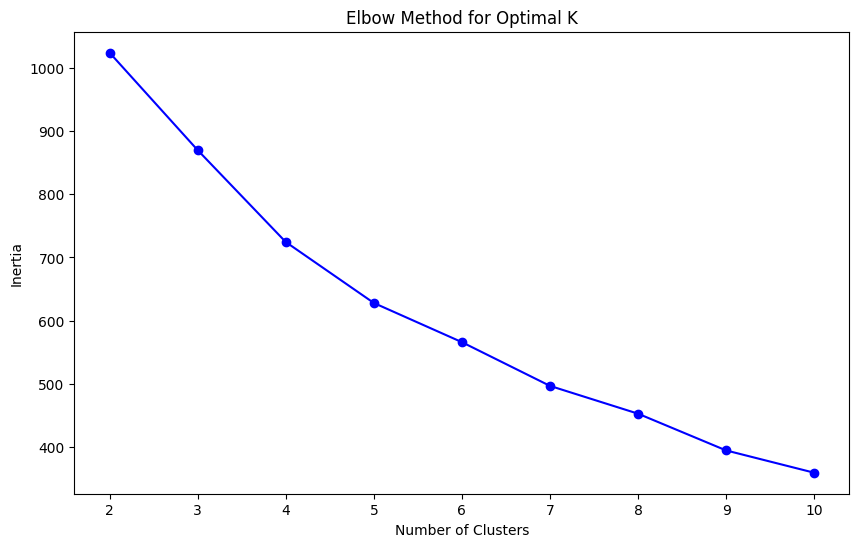

In [4]:
# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.savefig('../results/elbow_method.png')


In [5]:
#Apply k-means with optimal k
optimal_k =3
kmeans=KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels =kmeans.fit_predict(x)


In [6]:
#Hierarchical Clustering 
hierarchical =AgglomerativeClustering(n_clusters=optimal_k)
hier_labels = hierarchical.fit_predict(x)


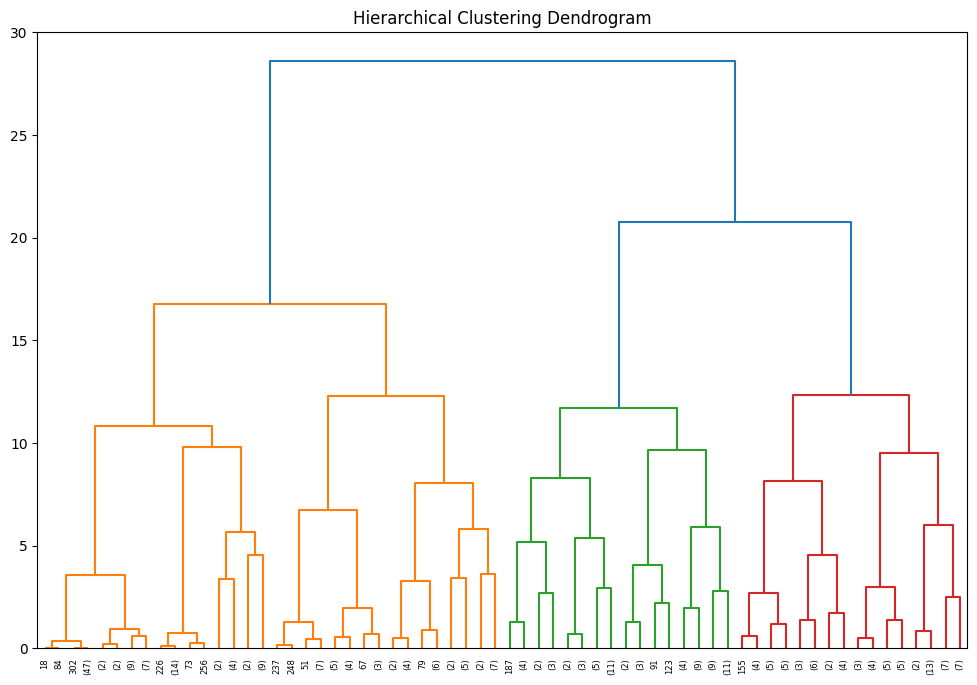

In [7]:
# Dendrogram
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(x, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.savefig('../results/dendrogram.png')


In [8]:
from sklearn.metrics import adjusted_rand_score
kmeans_ari = adjusted_rand_score(y, cluster_labels)
hier_ari = adjusted_rand_score(y, hier_labels)

print(f"K-Means ARI: {kmeans_ari:.3f}")
print(f"Hierarchical ARI: {hier_ari:.3f}")

K-Means ARI: 0.319
Hierarchical ARI: 0.172
